Do Zero ao Machine Learning
==============

Nesse workshop vamos aprender como utilizar as principais ferramentas do python para analise de dados, vamos usar um pouco de estatistica para retirar informações valiosas desses dados e também veremos alguns algoritmos de ML feitos em python.

---------------------

### Indice

* [Hello Python](#Hello-Python)
* [Preparando os Dados](#Preparando-os-Dados)
* [Entendendo os Dados](#Entendendo-os-Dados)
* [ML com scikit-learn](ML-com-scikit-learn)

---------------------

### Hello Python

In [85]:
print("oi turma!")

oi turma!


Dizem por ai que python não é a melhor linguagem pra quase nada, mas é a segunda melhor pra quase tudo.

[Historias de sucesso](https://www.python.org/success-stories/)

[Bibliotecas para cada area](https://www.python.org/about/apps/)

---------------------------

### Preparando os Dados

In [86]:
import pandas

In [87]:
df = pandas.read_csv("titanic.csv")

In [88]:
type(df)

pandas.core.frame.DataFrame

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


--------
Agora temos acesso aos dados dos passageiros do titanic.

Depois que um cientista de dados importa os dados, ele precisa validar algumas coisas:

* os dados estão no formato correto?
* os dados estão completos?
* preciso de todas as colunas?
* os nomes das colunas fazem sentido?

Vamos trabalhar essas perguntas e depois dar o proximo passo!

-----------

In [90]:
type(df["Age"])

pandas.core.series.Series

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [92]:
# primeiro vamos remover as colunas inuteis
del df["Ticket"]
del df["Cabin"]
del df["Name"]
del df["PassengerId"]

In [93]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


------

Pronto, eliminamos as colunas inuteis e conseguimos economizar 25% de memoria ram.

Os tipos das colunas parecem corretos, mas temos muitos passageiros sem idade, vamos arrumar isso pois idade será uma coluna que usaremos nos algoritmos de machine learning.

---------------

In [95]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [96]:
df.Age.mode()

0    24.0
dtype: float64

Temos duas opções aqui, trocar a idade pela mediana, pela media ou pela moda. Vamos avaliar o impacto de cada troca nos nossos dados.

In [97]:
idade_com_media = df.Age.fillna(df.Age.mean())
idade_com_media.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [98]:
idade_com_mediana = df.Age.fillna(df.Age.median())
idade_com_mediana.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [99]:
idade_com_moda = df.Age.fillna(df.Age.mode())
idade_com_moda.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

A troca pela mediana tem pouco impacto nas metricas gerais, então vamos seguir com ela.

In [100]:
df.Age = idade_com_mediana
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


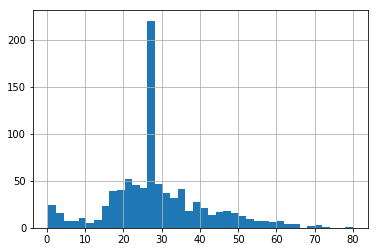

In [102]:
df.Age.hist(bins=40)

--------
Agora vamos acertar os nomes das colunas. As colunas Parch e SibSp não são muitos explicativas, vamos mexer nelas. 

------

In [103]:
df.rename(columns={"Parch": "parents/children", "SibSp": "siblings/spouses"}, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,siblings/spouses,parents/children,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


------------
### Entendendo os Dados

Antes de aplicar algoritmos de ML precisamos entender o que temos nas mãos.

In [104]:
df.Survived.mean()

0.3838383838383838

No geral, podemos afirmar que 38% das pessoas no titanic sobreviveram, mas e se colocarmos outras variaveis no contexto?

In [105]:
df.groupby("Pclass").mean()

,Survived,Age,siblings/spouses,parents/children,Fare
Pclass,,,,,
1,0.629630,36.812130,0.416667,0.356481,84.154687
2,0.472826,29.765380,0.402174,0.380435,20.662183
3,0.242363,25.932627,0.615071,0.393075,13.675550


--------
Olhando agora vemos que a taxa de sobrevivencia aumenta muito para pessoas da primeira classe.

Outras coisas que podemos observar é:

* pessoas da terceira classe pagaram menos.
* na terceira classe também estavam os mais jovens.
* a primeira classe tem o menor indice de parentes a bordo (pais, filhos, esposas e irmãos).


In [106]:
df.groupby(["Pclass", "Sex"]).mean()

Survived        Age  siblings/spouses  parents/children  \
Pclass Sex                                                               
1      female  0.968085  33.978723          0.553191          0.457447   
       male    0.368852  38.995246          0.311475          0.278689   
2      female  0.921053  28.703947          0.486842          0.605263   
       male    0.157407  30.512315          0.342593          0.222222   
3      female  0.500000  23.572917          0.895833          0.798611   
       male    0.135447  26.911873          0.498559          0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [107]:
por_classe_e_sexo = df.groupby(["Pclass", "Sex"])

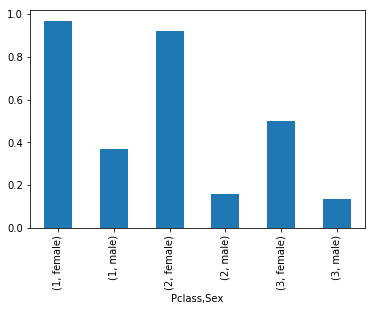

In [108]:
%matplotlib inline
por_classe_e_sexo.mean().Survived.plot(kind="bar")

No filme vemos os oficiais gritando "Mulheres e Crianças primeiro", e podemos confirmar a primeira parte da frase com os dados acima.

Vamos ver agora se podemos confirmar a segunda.

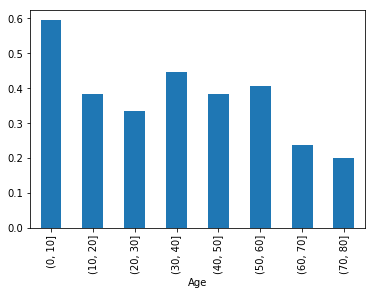

In [109]:
faixa_etaria = pandas.cut(df.Age, range(0, 90, 10))
df.groupby(faixa_etaria).mean().Survived.plot(kind="bar")

Podemos visualmente entender algumas correlações entre variaveis (sobrevivencia pelo sexo e pela classe), mas será que podemos matematicamente provar que essas correlações são validas?

--------------------
#### Estatistisca e teste de hipotese

Com estatistica conseguimos provar que a correlação é valida entre variaveis categoricas, colunas que separam os dados em categorias, como sexo e classe.

Vamos aprender um jeito de validar essa correlação, usando **teste do chi-quadrado**.

-----------
Primeiro vamos responder a seguinte pergunta:
#### A classe do passageiro influencia a taxa de sobrevivencia?

**Hipotese nula**: a taxa de sobrevivencia é independente da classe

**Hipotese alternativa**: a taxa de sobrevivencia depende da classe

In [110]:
from scipy import stats

In [111]:
tabela_de_frequencia = pandas.crosstab(df.Survived, df.Pclass)

In [112]:
_, pval, _, _ = stats.chi2_contingency(tabela_de_frequencia)

In [113]:
p_limite = 0.05

In [115]:
tabela_de_frequencia

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [121]:
# o p-valor é a chance de validar a hipotese nula pegando valores randomicos
pval

4.5492517112987927e-23

In [123]:
# queremos aceitar a hipotese nula se ela tiver 5% de chance de ser validade randomicamente
pval > p_limite

False

Aprendemos como validar estatisticamente uma hipotese usando chi-quadrado.

Vamos tentar validar outras hipoteses.

--------

### ML com scikit-learn

Existem diversos algoritmos classicos de machine learning, Regressão Linear, Regressão Logistica, Arvore de Decisão, Random Forest, entre outros. Cada um tem suas peculiaridades, vantagens e desvantagens.

Nessa aula escolhemos usar o algoritmo de Random Forest. **PORQUE**

Para que ele funcione, nossos dados categoricos devem estar como numeros. Vamos modificar isso.

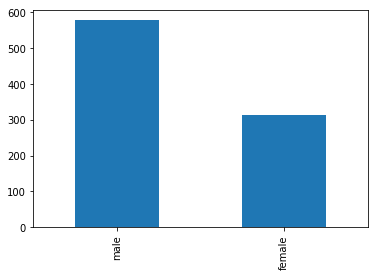

In [127]:
df.Sex.value_counts().plot(kind='bar')

In [128]:
import numpy
numpy.where?

In [131]:
numpy.where(df["Sex"] == "female", 0, 1)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0,

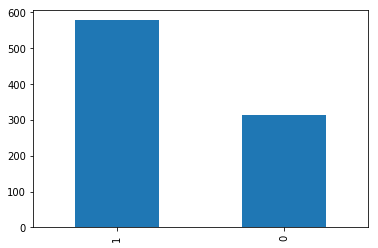

In [132]:
df.Sex = numpy.where(df['Sex'] == "female", 0, 1)
df.Sex.value_counts().plot(kind="bar")

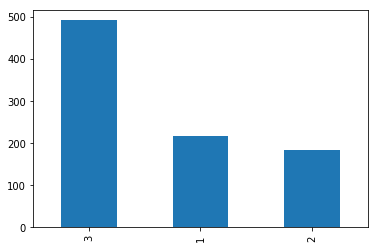

In [133]:
df.Pclass.value_counts().plot(kind="bar")

Todos nossos dados categoricos estão como numero, então podemos seguir tranquilos para aplicar nosso algoritmo.

Agora temos que separar nossa base em dados de treino e dados de validação.

In [154]:
from sklearn.cross_validation import train_test_split
expected_output = df["Survived"]
data_input = df[["Sex", "Survived", "Pclass"]]
inputs_train, inputs_test, expected_output_train, expected_output_test = train_test_split(
    data_input,
    expected_output,
    test_size=0.33,
    random_state=91
)

In [155]:
inputs_train.head()

,Sex,Survived,Pclass
23,1,1,1
65,1,1,3
122,1,0,2
421,1,0,3
423,0,0,3


In [156]:
expected_output_train.head()

23     1
65     1
122    0
421    0
423    0
Name: Survived, dtype: int64

In [157]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)

In [158]:
forest.fit(inputs_train, expected_output_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

---------
O que fizemos agora foi treinar nosso algoritmo com os dados. Ele gerou uma formula matematica para calcular a possibilidade de uma pessoa, dado sexo idade e classe, de sobreviver ao acidente.

Depois de treinado precisamos avaliar a **acuracia** do nosso algoritmo. Para isso usamos os dados de validação.

In [159]:
acuracia = forest.score(inputs_test, expected_output_test)
"Acuracia = {}%".format(acuracia * 100)

'Acuracia = 100.0%'